<a href="https://colab.research.google.com/github/yuchiaochu/AgentGPT/blob/main/112030517_CHE493_MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Directory

In [ ]:
from google.colab import drive
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/2023_CHE493_HW')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read file

In [ ]:
dataset = pd.read_csv('./GOOG.csv', index_col=0)
print(dataset.head(5))

                             date   close    high       low    open   volume  \
symbol                                                                         
GOOG    2016-06-14 00:00:00+00:00  718.27  722.47  713.1200  716.48  1306065   
GOOG    2016-06-15 00:00:00+00:00  718.92  722.98  717.3100  719.00  1214517   
GOOG    2016-06-16 00:00:00+00:00  710.36  716.65  703.2600  714.91  1982471   
GOOG    2016-06-17 00:00:00+00:00  691.72  708.82  688.4515  708.65  3402357   
GOOG    2016-06-20 00:00:00+00:00  693.71  702.48  693.4100  698.77  2082538   

        adjClose  adjHigh    adjLow  adjOpen  adjVolume  divCash  splitFactor  
symbol                                                                         
GOOG      718.27   722.47  713.1200   716.48    1306065      0.0          1.0  
GOOG      718.92   722.98  717.3100   719.00    1214517      0.0          1.0  
GOOG      710.36   716.65  703.2600   714.91    1982471      0.0          1.0  
GOOG      691.72   708.82  688.4515   7

Data standardization

In [ ]:
val = dataset.values
x = val[:,1:11]
y = val[:,1].reshape(-1,1)
x = x.astype(float)
y = y.astype(float)

x_mean = x.mean(axis=0)
x_std = x.std(axis=0)
y_mean = y.mean(axis=0)
y_std = y.std(axis=0)

x_z = (x-x_mean)/x_std
y_z = (y-y_mean)/y_std



Analyze Data distribution

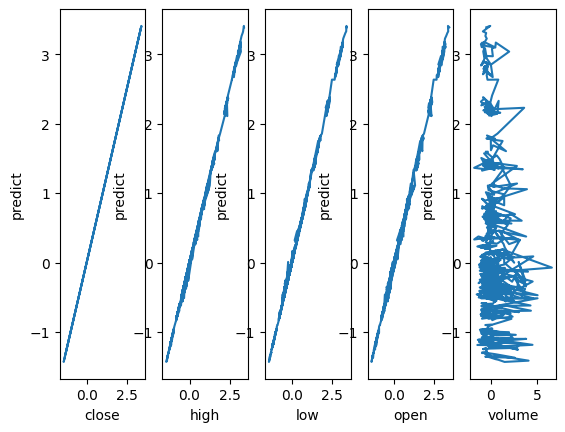

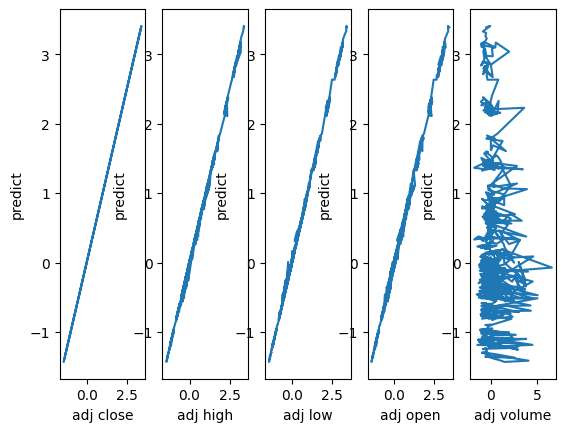

In [ ]:
plt.subplot(151)
plt.plot(x_z[:,0],y_z,)
plt.xlabel('close')
plt.ylabel('predict')

plt.subplot(152)
plt.plot(x_z[:,1],y_z,)
plt.xlabel('high')
plt.ylabel('predict')

plt.subplot(153)
plt.plot(x_z[:,2],y_z,)
plt.xlabel('low')
plt.ylabel('predict')

plt.subplot(154)
plt.plot(x_z[:,3],y_z,)
plt.xlabel('open')
plt.ylabel('predict')

plt.subplot(155)
plt.plot(x_z[:,4],y_z,)
plt.xlabel('volume')
plt.ylabel('predict')
plt.show()

plt.subplot(151)
plt.plot(x_z[:,5],y_z,)
plt.xlabel('adj close')
plt.ylabel('predict')

plt.subplot(152)
plt.plot(x_z[:,6],y_z,)
plt.xlabel('adj high')
plt.ylabel('predict')

plt.subplot(153)
plt.plot(x_z[:,7],y_z,)
plt.xlabel('adj low')
plt.ylabel('predict')

plt.subplot(154)
plt.plot(x_z[:,8],y_z,)
plt.xlabel('adj open')
plt.ylabel('predict')

plt.subplot(155)
plt.plot(x_z[:,9],y_z,)
plt.xlabel('adj volume')
plt.ylabel('predict')
plt.show()

Histogram Charts

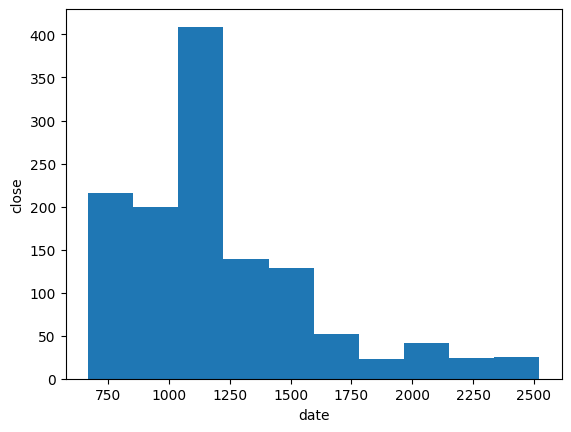

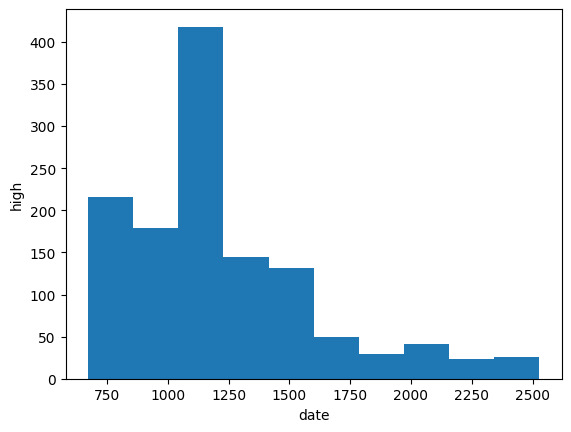

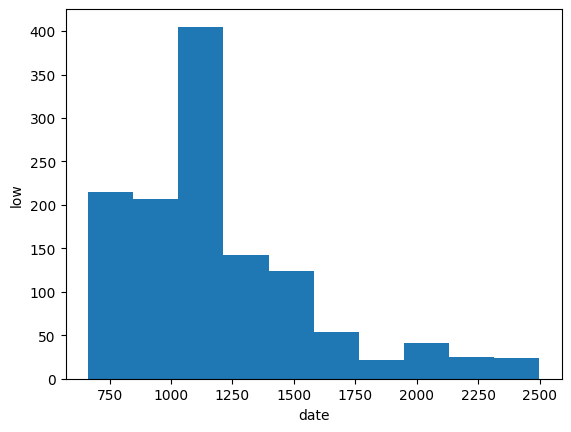

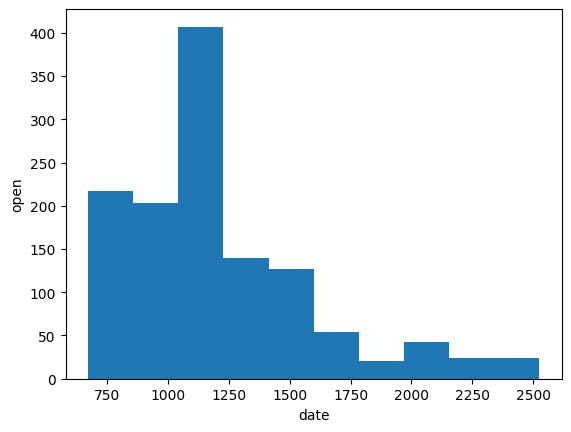

In [ ]:
plt.hist(dataset['close'])
plt.xlabel('date')
plt.ylabel('close')
plt.show()

plt.hist(dataset['high'])
plt.xlabel('date')
plt.ylabel('high')
plt.show()

plt.hist(dataset['low'])
plt.xlabel('date')
plt.ylabel('low')
plt.show()

plt.hist(dataset['open'])
plt.xlabel('date')
plt.ylabel('open')
plt.show()

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_days = 7
n_features = x_z.shape[1]
data_gen = TimeseriesGenerator(x_z, y_z,length=n_days, sampling_rate=1, batch_size=100000000)
batch_0 = data_gen[0]
x_z_t, y_z_t = batch_0
date = pd.to_datetime(dataset.date)[7:]
print(date)
print(x_z_t.shape, y_z_t.shape, date.shape)

symbol
GOOG   2016-06-23 00:00:00+00:00
GOOG   2016-06-24 00:00:00+00:00
GOOG   2016-06-27 00:00:00+00:00
GOOG   2016-06-28 00:00:00+00:00
GOOG   2016-06-29 00:00:00+00:00
                  ...           
GOOG   2021-06-07 00:00:00+00:00
GOOG   2021-06-08 00:00:00+00:00
GOOG   2021-06-09 00:00:00+00:00
GOOG   2021-06-10 00:00:00+00:00
GOOG   2021-06-11 00:00:00+00:00
Name: date, Length: 1251, dtype: datetime64[ns, UTC]
(1251, 7, 10) (1251, 1) (1251,)


Train_Test_Split

In [ ]:
from sklearn.model_selection import train_test_split
spilt_ratio = 0.2
x_z_train, x_z_test, y_z_train, y_z_test = train_test_split(x_z_t, y_z_t, test_size=spilt_ratio, shuffle=False)
Length = y_z_train.shape[0]
date_train = date[:Length]
date_test = date[Length:]
print(x_z_train.shape, y_z_train.shape, date_train.shape, x_z_test.shape, y_z_test.shape, date_test.shape)

(1000, 7, 10) (1000, 1) (1000,) (251, 7, 10) (251, 1) (251,)


Model Buildup

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  LSTM, Dropout

model = Sequential()
model.add(LSTM(128,input_shape=(n_days,n_features),activation='relu', return_sequences=True))
model.add(LSTM(64,activation='relu', return_sequences=True))
model.add(LSTM(32,activation='relu', return_sequences=False))
model.add(Dense(4))
model.add(Dense(1))


from tensorflow.keras.optimizers import Adam
model.compile(loss='mae', optimizer=Adam(learning_rate=0.001))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 128)            71168     
                                                                 
 lstm_1 (LSTM)               (None, 7, 64)             49408     
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 4)                 132       
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 133,129
Trainable params: 133,129
Non-trainable params: 0
_________________________________________________________________


Model Train

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
earlystopping = EarlyStopping(monitor='val_loss', patience=20)
modelcheckpoint = ModelCheckpoint(filepath='./save/GoogleStockModel.h5', monitor="val_loss", save_best_only=True)

In [ ]:
history = model.fit(x_z_train, y_z_train, epochs=300, batch_size=128,
                    validation_split=0.1, shuffle=True, callbacks=[earlystopping, modelcheckpoint])
history

Epoch 1/300
8/8 [==============================] - 0s 49ms/step - loss: 0.0501 - val_loss: 0.1900
Epoch 2/300
8/8 [==============================] - 0s 46ms/step - loss: 0.0568 - val_loss: 0.1950
Epoch 3/300
8/8 [==============================] - 1s 86ms/step - loss: 0.0503 - val_loss: 0.1442
Epoch 4/300
8/8 [==============================] - 0s 46ms/step - loss: 0.0491 - val_loss: 0.1653
Epoch 5/300
8/8 [==============================] - 0s 45ms/step - loss: 0.0519 - val_loss: 0.2663
Epoch 6/300
8/8 [==============================] - 0s 44ms/step - loss: 0.0622 - val_loss: 0.1583
Epoch 7/300
8/8 [==============================] - 0s 49ms/step - loss: 0.0515 - val_loss: 0.1843
Epoch 8/300
8/8 [==============================] - 1s 90ms/step - loss: 0.0511 - val_loss: 0.1364
Epoch 9/300
8/8 [==============================] - 1s 82ms/step - loss: 0.0485 - val_loss: 0.1536
Epoch 10/300
8/8 [==============================] - 1s 89ms/step - loss: 0.0510 - val_loss: 0.1923
Epoch 11/300
8/8 [=

Learning Curve

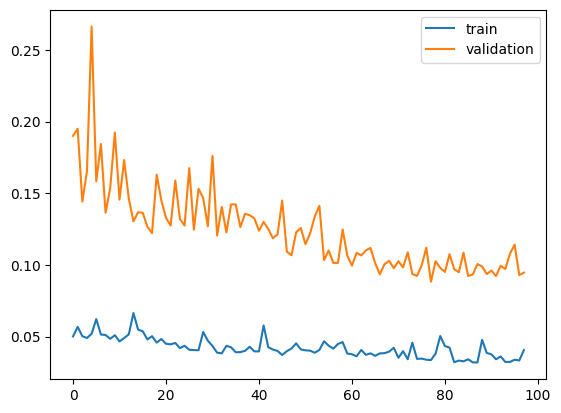

In [ ]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

Load Weight

In [ ]:
model.load_weights('./save/GoogleStockModel.h5')

R2 RMSE

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
y_z_pred_train = model.predict(x_z_train)

y_pred_train = y_z_pred_train * y_std + y_mean
y_train = y_z_train * y_std + y_mean

rmse = sqrt(mean_squared_error(y_train, y_pred_train))
r2 = r2_score(y_train, y_pred_train)
print('Test RMSE: %.3f' % rmse)
print('Test R2: %.3f' % r2)

32/32 [==============================] - 1s 7ms/step
Test RMSE: 22.031
Test R2: 0.987


Parity Chart_Predict data vs Train data

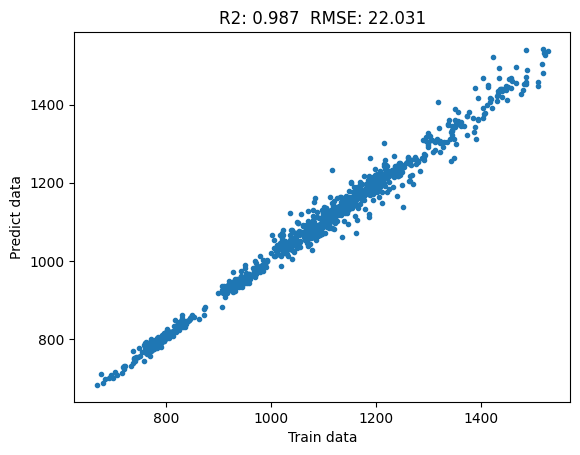

In [ ]:
plt.figure()
plt.plot(y_train, y_pred_train,'.')
plt.title('R2: %0.3f  RMSE: %0.3f'%(r2, rmse))
plt.xlabel('Train data')
plt.ylabel('Predict data')
plt.show()

Time Series Chart_Train

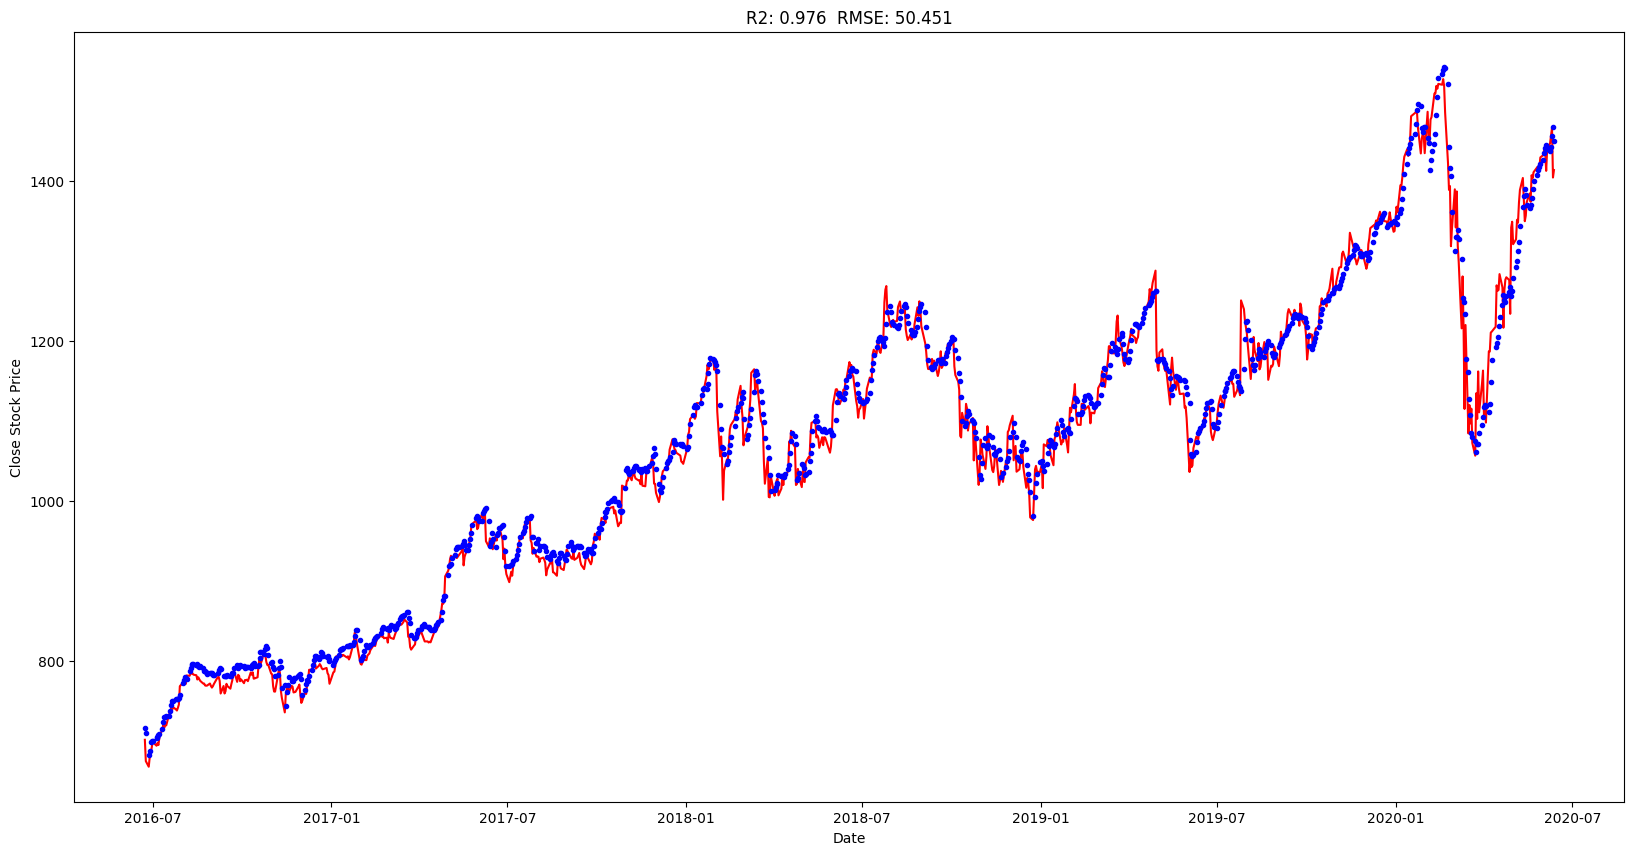

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(date_train, y_train,'r-')
plt.plot(date_train, y_pred_train,'b.')
plt.title('R2: %0.3f  RMSE: %0.3f'%(r2, rmse))
plt.xlabel('Date')
plt.ylabel('Close Stock Price')
plt.show()

Model Test

In [ ]:
y_z_pred_test = model.predict(x_z_test)

y_pred_test = y_z_pred_test * y_std + y_mean
y_test = y_z_test * y_std + y_mean

rmse = sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
print('Test RMSE: %.3f' % rmse)
print('Test R2: %.3f' % r2)

8/8 [==============================] - 0s 9ms/step
Test RMSE: 50.451
Test R2: 0.976


Parity Cart_Predict data vs Test data

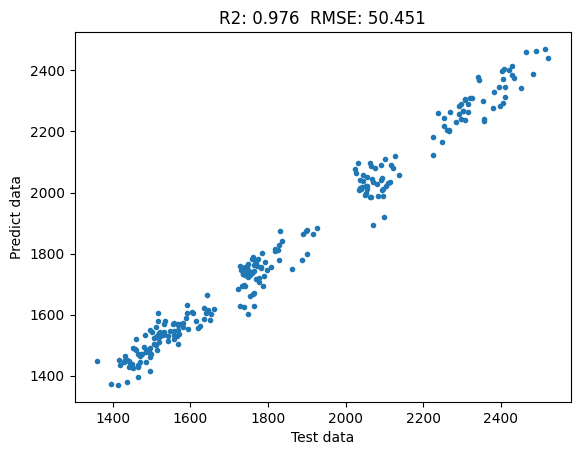

In [ ]:
plt.figure()
plt.plot(y_test, y_pred_test,'.')
plt.title('R2: %0.3f  RMSE: %0.3f'%(r2, rmse))
plt.xlabel('Test data')
plt.ylabel('Predict data')
plt.show()

Time Series Chart_Test

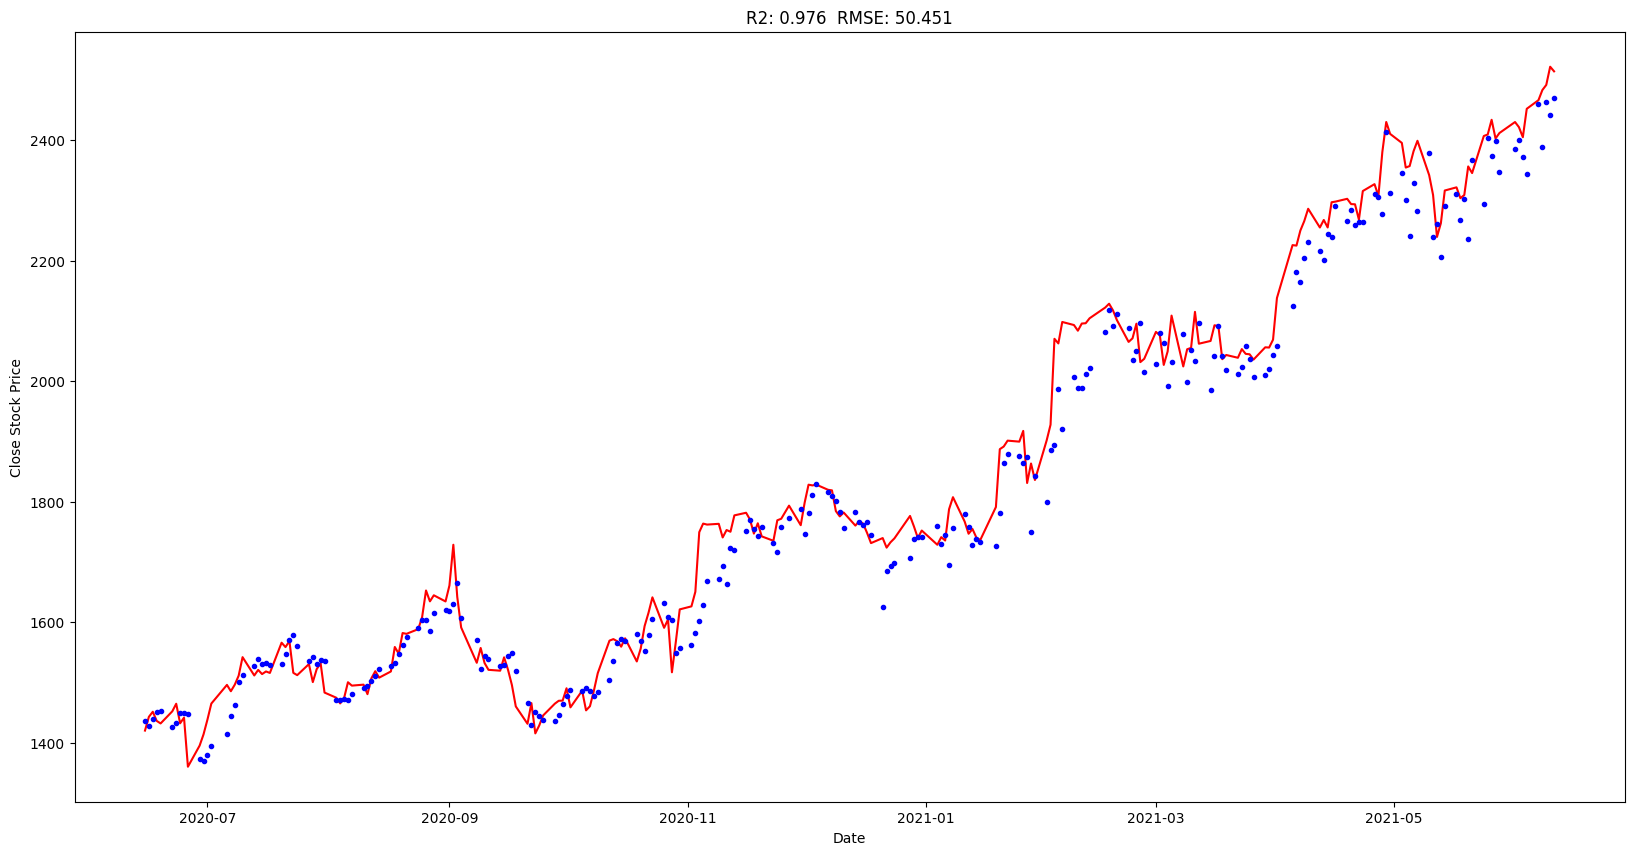

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(date_test, y_test,'r-')
plt.plot(date_test, y_pred_test,'b.')
plt.title('R2: %0.3f  RMSE: %0.3f'%(r2, rmse))
plt.xlabel('Date')
plt.ylabel('Close Stock Price')
plt.show()